# ID3 Algorithm

**Componenets of ID3 Algorithm**

***Entropy***

A measure of the randomness or disorder in the dataset. It quantifies the amount of uncertainty or impurity in data

***Information Gain***

The difference in entropy before and after the dataset is split on the attributes. It measures how well an attribute seperates the classes. The attribute with the highest information gain is chosen for the split

***Decision tree***

decision trees mimic human thinking ability


**Terminologies**

*   Root node
*   Leaf node
*   Splitting
*   Branch / sub tree
*   pruning
*   parent/child node

**How does decision tree algo work**

for predicting the class of the given dataset the algorithm starts from the root node of the tree

**Steps in ID3**
calculate entropy
calculate infor gain
choose the best attribute
split the dataset
recursively build the tree



In [ ]:
#In the new Colab notebook, you'll need to import several Python libraries,
# including Pandas for data handling and visualization and Scikit-learn for machine learning algorithms.
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)
df.head()


,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rain,Mild,High,False,Yes
4,Rain,Cool,Normal,False,Yes


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])
df_encoded['Play'] = df['Play'].apply(lambda x: 1 if x == 'Yes' else 0)
df_encoded.head()

,Play,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Windy_False,Windy_True
0,0,False,False,True,False,True,False,True,False,True,False
1,0,False,False,True,False,True,False,True,False,False,True
2,1,True,False,False,False,True,False,True,False,True,False
3,1,False,True,False,False,False,True,True,False,True,False
4,1,False,True,False,True,False,False,False,True,True,False


In [ ]:
X = df_encoded.drop('Play', axis=1)
y = df_encoded['Play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



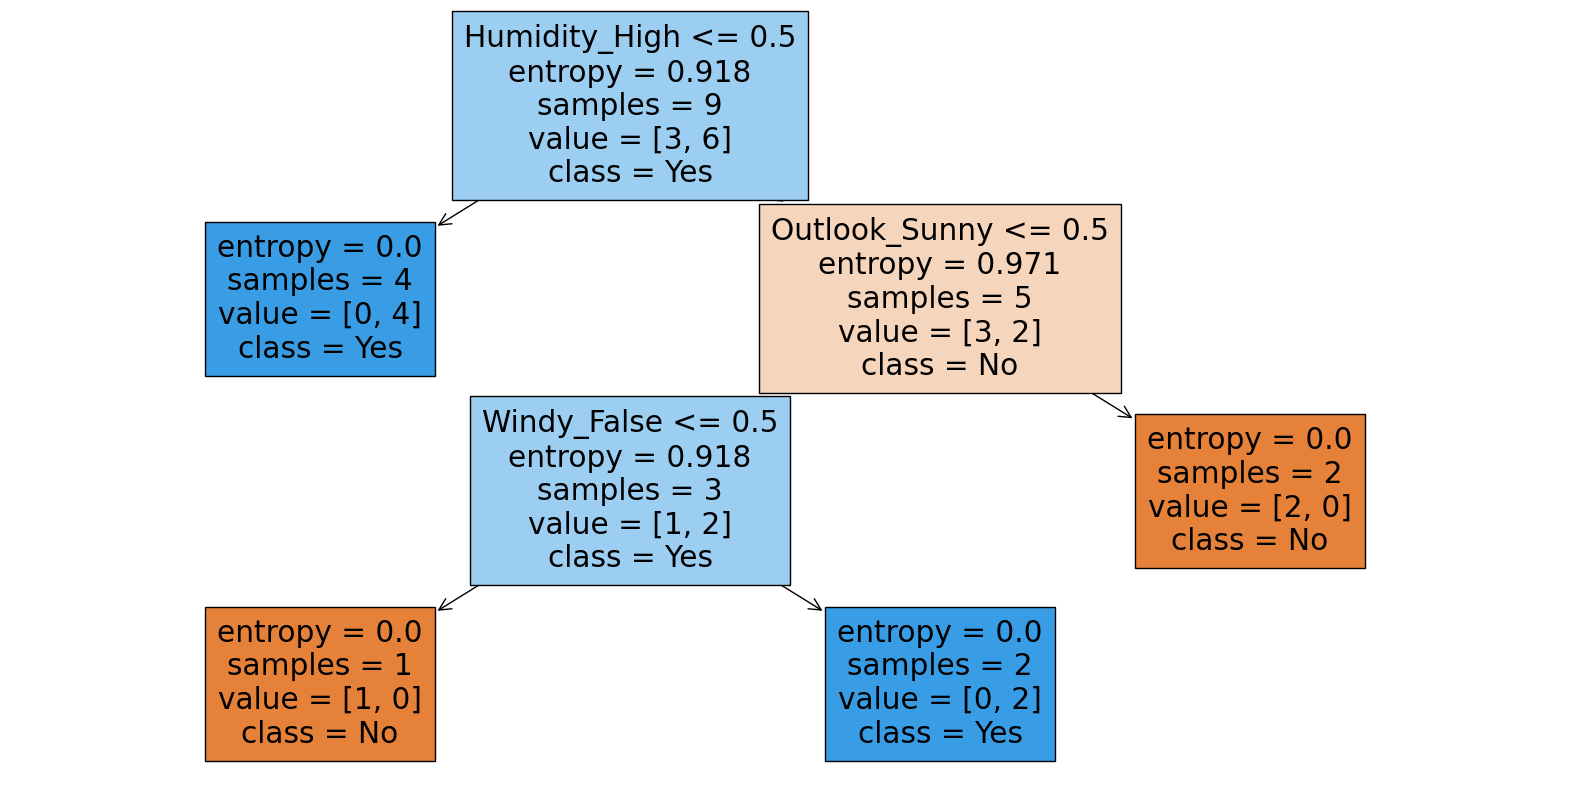

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

